# Uniform quantization in frequency domain

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from skimage.util import img_as_ubyte
import matplotlib.image as mpimg

In [7]:
# loading image
img = img_as_ubyte(mpimg.imread('i/super_mario_head.png'))
choosen_y_x = 90
resolution = 128

img_slice = img[choosen_y_x:(choosen_y_x + resolution), choosen_y_x:(choosen_y_x + resolution), 2]

# Distribution: Frequency vs Spatial

<Container object of 99 artists>

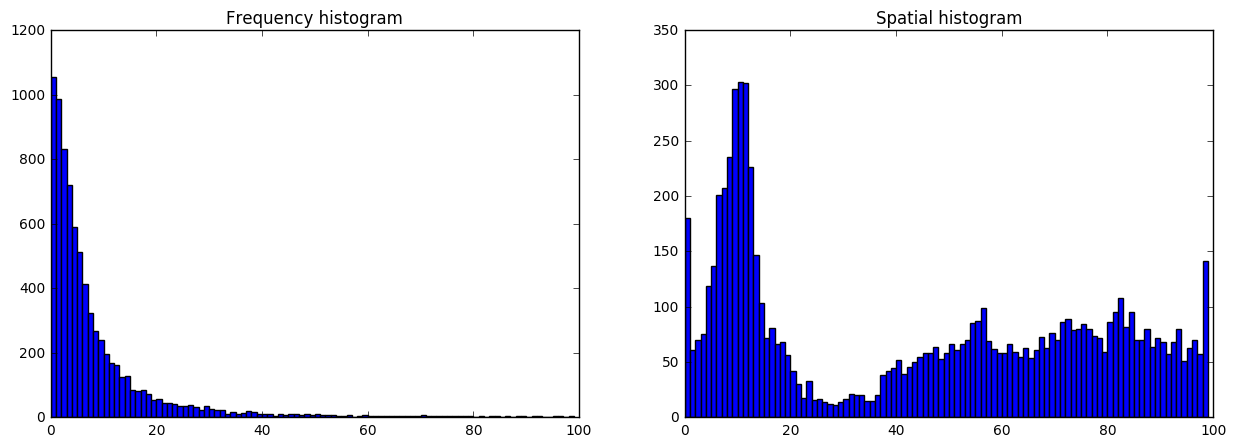

In [8]:
# transform: 2D DCT
dct_slice = fftpack.dct(fftpack.dct(img_slice.T, norm='ortho').T, norm='ortho')

dct_hist, dct_bin_edges = np.histogram(dct_slice, bins = range(100))
img_hist, img_bin_edges = np.histogram(img_slice, bins = range(100))

f, (plt1, plt2) = plt.subplots(1, 2, figsize=(15, 5))

plt1.set_title('Frequency histogram')
plt1.bar(dct_bin_edges[:-1], dct_hist, width = 1)

plt2.set_title('Spatial histogram')
plt2.bar(img_bin_edges[:-1], img_hist, width = 1)

# Quantize by dividing and requantize by multyplying

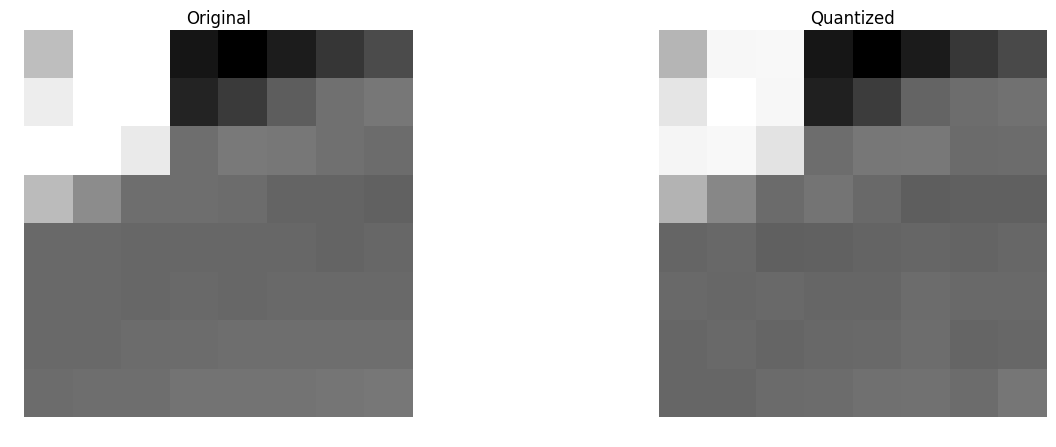

In [9]:
block = img_slice[80:88, 40:48]

quantize_step = 5

dct_slice = fftpack.dct(fftpack.dct(block.T, norm='ortho').T, norm='ortho')


dct_slice_quantized = np.divide(dct_slice,[quantize_step])
rounded_quantized = np.around(dct_slice_quantized)

dct_slice_requantized = np.multiply(rounded_quantized,[quantize_step])

idct_slice = fftpack.idct(fftpack.idct(dct_slice_requantized.T, norm='ortho').T, norm='ortho')


f, (plt1, plt2) = plt.subplots(1, 2, figsize=(15, 5))

plt1.axis('off');
plt1.set_title('Original')
plt1.imshow(block, cmap='gray',interpolation='nearest')

plt2.axis('off');
plt2.set_title('Quantized')
plt2.imshow(idct_slice, cmap='gray',interpolation='nearest')

# DCT Coefficients

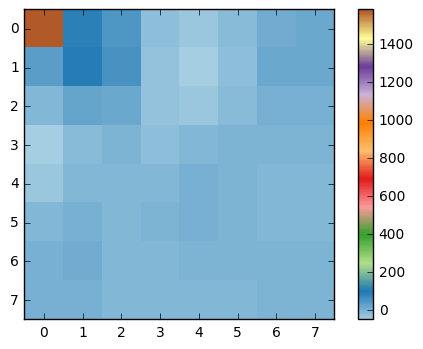

In [10]:
plt.imshow(dct_slice, interpolation='nearest', cmap=plt.cm.Paired)
plt.colorbar(shrink=1)

# Discarding based on coefficient importance

In [11]:
# a 8x8 block
block = img_slice[80:88, 40:48]

# a 2D DCT
dct_slice = fftpack.dct(fftpack.dct(block.T, norm='ortho').T, norm='ortho')

original_dct_slice = np.copy(dct_slice)

# keeps only the top left 5 element triangle
for u in range(8):
    for v in range(8):
        if (u + v) > 5:
            dct_slice[u, v] = 0

print("It compressed ", 100 - ((np.count_nonzero(dct_slice)/64) * 100), "% of the block.")

It compressed  67.1875 % of the block.


## Pixel Original

In [13]:
np.set_printoptions(precision=1, linewidth=140, suppress=True)
block

array([[227, 255, 255, 155, 146, 158, 169, 178],
       [247, 255, 255, 161, 171, 186, 194, 197],
       [255, 255, 246, 193, 198, 197, 194, 192],
       [226, 206, 193, 193, 192, 189, 189, 188],
       [191, 191, 190, 190, 190, 190, 189, 190],
       [191, 191, 190, 191, 190, 191, 191, 191],
       [191, 191, 192, 192, 193, 193, 193, 193],
       [192, 193, 193, 195, 195, 195, 196, 197]], dtype=uint8)

## DCT Original

In [14]:
original_dct_slice

array([[ 1582. ,    87.2,    51.8,   -15.9,   -34.2,   -12.8,    14. ,    17.4],
       [   38.5,    96.1,    56. ,   -24.7,   -44.4,   -15.5,    17.1,    20.9],
       [   -3.2,    24.8,    20.3,   -26.2,   -28.9,    -9. ,     8.6,     9.8],
       [  -47.1,    -9.9,    -1.5,   -15.9,    -8.3,    -1.2,     0.9,    -1.4],
       [  -33. ,    -8.3,    -5. ,    -3. ,     7.8,     3.5,    -4.2,    -6. ],
       [   -8.3,     8.5,    -3.5,     2.3,     7.9,     2.9,    -3.7,    -4. ],
       [    8.6,    12.1,    -5.1,    -3.3,    -0.5,    -1.5,    -2. ,    -1.8],
       [    7.4,     5.8,    -6.7,    -5.9,    -5. ,    -3.8,     0.4,     0.9]])

## Quantized

In [15]:
dct_slice

array([[ 1582. ,    87.2,    51.8,   -15.9,   -34.2,   -12.8,     0. ,     0. ],
       [   38.5,    96.1,    56. ,   -24.7,   -44.4,     0. ,     0. ,     0. ],
       [   -3.2,    24.8,    20.3,   -26.2,     0. ,     0. ,     0. ,     0. ],
       [  -47.1,    -9.9,    -1.5,     0. ,     0. ,     0. ,     0. ,     0. ],
       [  -33. ,    -8.3,     0. ,     0. ,     0. ,     0. ,     0. ,     0. ],
       [   -8.3,     0. ,     0. ,     0. ,     0. ,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. ,     0. ,     0. ,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. ,     0. ,     0. ,     0. ,     0. ,     0. ]])

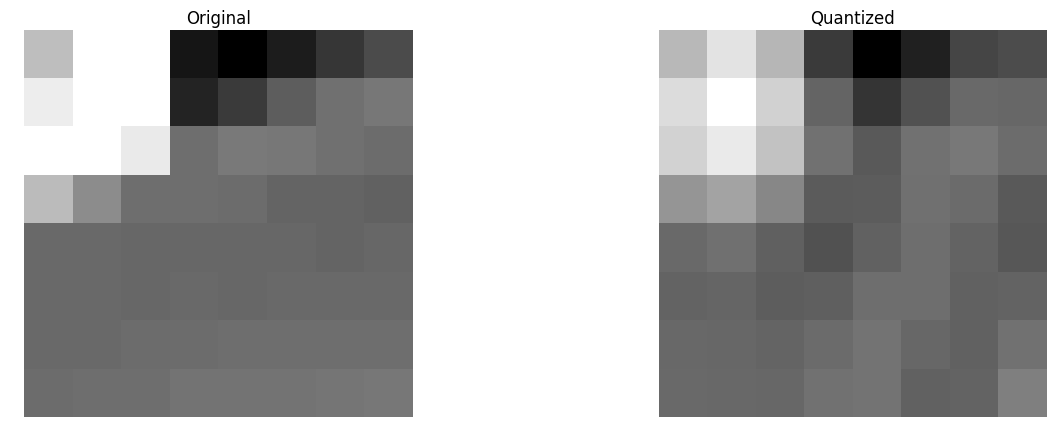

In [16]:
idct_slice = fftpack.idct(fftpack.idct(dct_slice.T, norm='ortho').T, norm='ortho')


f, (plt1, plt2) = plt.subplots(1, 2, figsize=(15, 5))

plt1.axis('off');
plt1.set_title('Original')
plt1.imshow(block, cmap='gray', interpolation='nearest')

plt2.axis('off');
plt2.set_title('Quantized')
plt2.imshow(idct_slice, cmap='gray', interpolation='nearest')

# JPEG quantization table

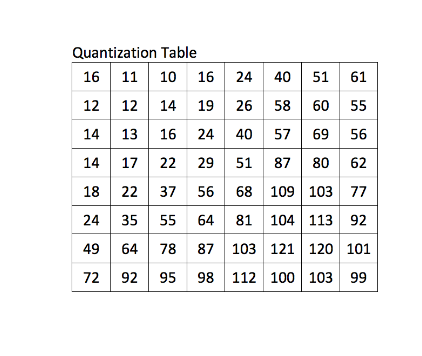

In [17]:
img = mpimg.imread('i/jpeg_quantization_table.png')
plt.axis('off');
plt.imshow(img)